In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aitxdil-project-jupyter/sampleSubmission.csv
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/94.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/48.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/61.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/37.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/35.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/70.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/73.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/92.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/75.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data/89.png
/kaggle/input/aitxdil-project-jupyter/Cleaned_Train

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

import cv2
from tqdm import tqdm
import random as rn

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [11]:
def make_train_data(X,DIR):
    for img in tqdm(os.listdir(DIR)):

        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (540,420))

        X.append(np.array(img))

In [13]:
X=[]
make_train_data(X,DIR = '/kaggle/input/aitxdil-project-jupyter/Training_Data/Training_Data')
Y=[]
make_train_data(Y,DIR = '/kaggle/input/aitxdil-project-jupyter/Cleaned_Training_Data/Cleaned_Training_Data')

100%|██████████| 100/100 [00:00<00:00, 247.31it/s]


In [14]:
Y = np.array(Y)
X = np.array(X)

X=X/255
Y=Y/255

print(X.shape)
print(Y.shape)

(100, 420, 540, 3)
(100, 420, 540, 3)


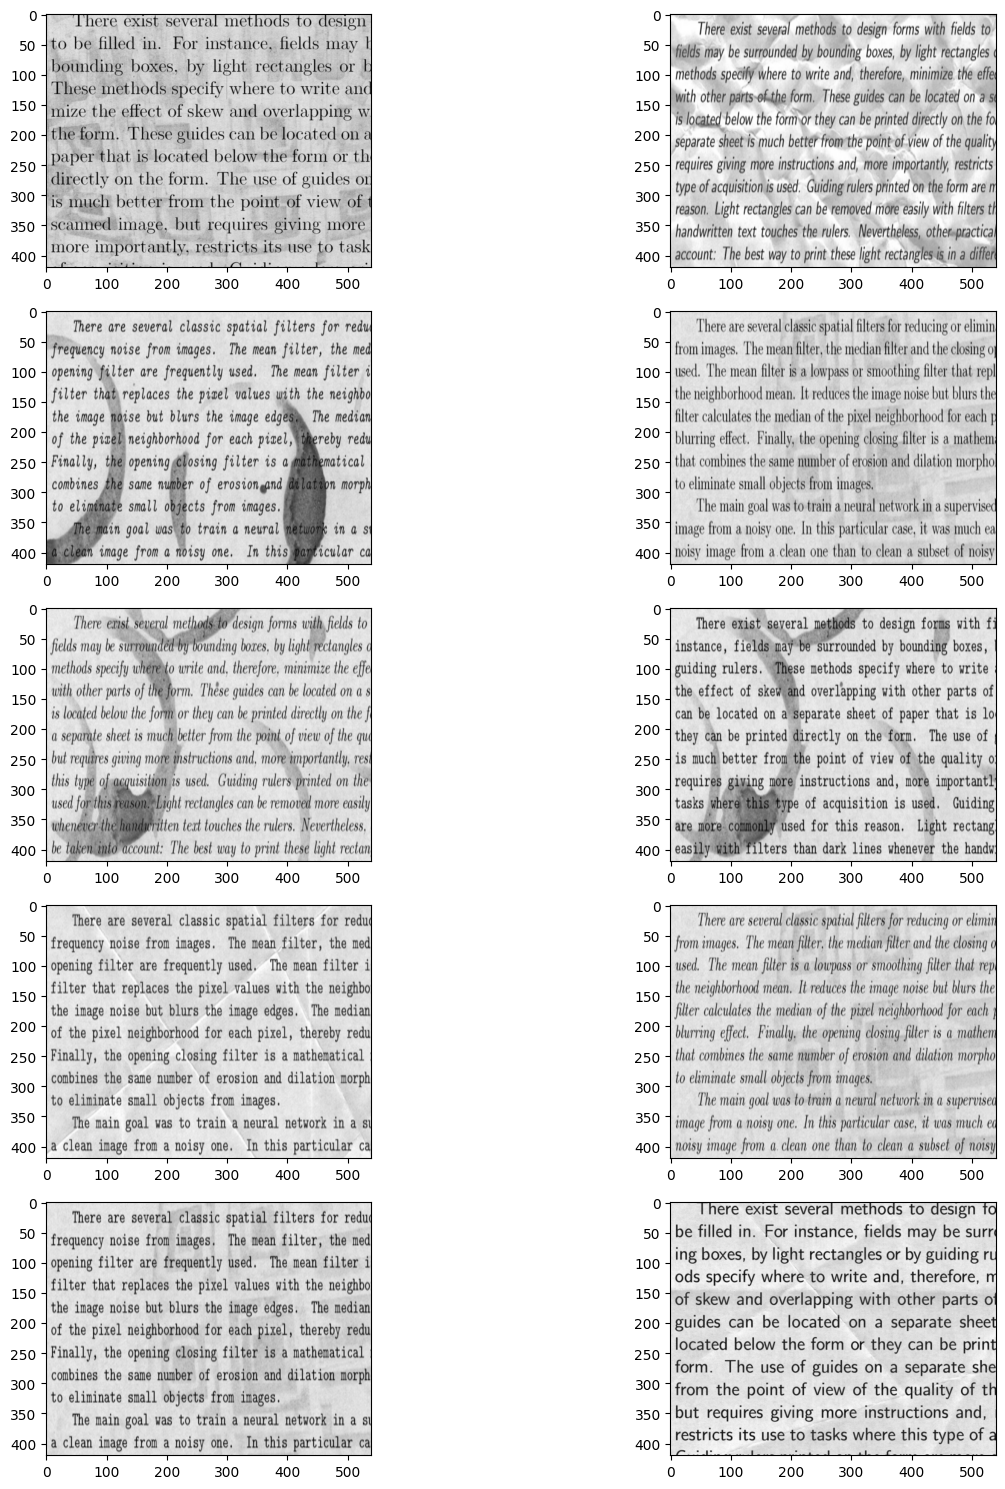

In [16]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
count = 0
for i in range(5):
    for j in range(2):
        ax[i, j].imshow(X[count])
        count += 1

plt.tight_layout()

In [21]:
input_shape = (420, 540, 3)
num_filters = [32, 64, 128]

import tensorflow
inputs = tensorflow.keras.layers.Input(shape=input_shape)

x = tensorflow.keras.layers.Conv2D(32 ,(3, 3), activation='relu', padding='same')(inputs)

for f in num_filters[1:]:
    x = tensorflow.keras.layers.Conv2D(f, (3, 3), activation='relu', padding='same')(x)

outputs = tensorflow.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

model = tensorflow.keras.Model(inputs=inputs, outputs=outputs)

In [23]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

In [24]:
model.fit(X, Y, epochs=150, batch_size=32)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 196s 44s/step - loss: 0.1907
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 187s 42s/step - loss: 0.0649
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 187s 42s/step - loss: 0.0647
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 189s 43s/step - loss: 0.0600
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 189s 43s/step - loss: 0.0502
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 189s 43s/step - loss: 0.0395
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 188s 43s/step - loss: 0.0297
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 189s 43s/step - loss: 0.0205
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 188s 43s/step - loss: 0.0134
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 203s 43s/step - loss: 0.0098
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 188s 42s/step - loss: 0.0077
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 188s 43s/step - loss: 0.0070
Epoch 13/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 190s 43s/step - loss: 0.0062
Epoch 14/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 190s 43s/step - loss: 0.0052
Epoch 15/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 188s 43s/step - loss: 0.0046
Epoc

In [27]:
model.save('my_model.h5')

In [30]:
test = []
labels = []
make_train_data(test,DIR = '/kaggle/input/aitxdil-project-jupyter/Test_Data/Test_Data')

test = np.array(test)
test = test/255

test.shape

100%|██████████| 44/44 [00:00<00:00, 53.36it/s]


(44, 420, 540, 3)

In [31]:
test_data_predicted = model.predict(test)
test_data_predicted.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step


(44, 420, 540, 3)

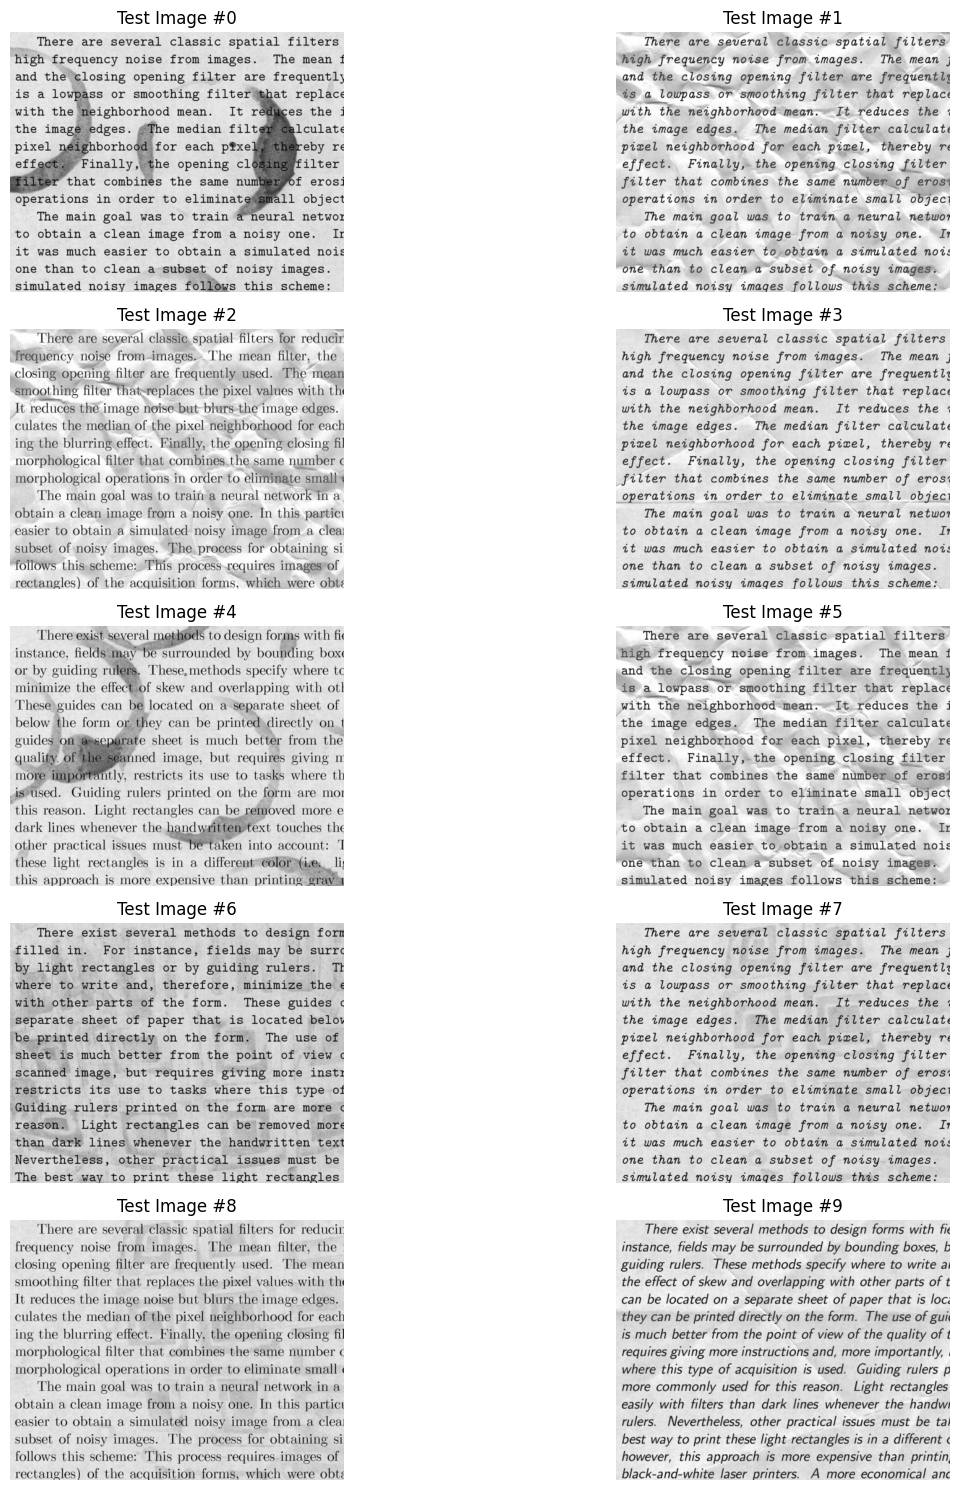

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

index = 0
for i in range(5):
    for j in range(2):
        ax[i, j].imshow(test[index])
        ax[i, j].set_title(f"Test Image #{index}")
        ax[i, j].axis('off')
        index += 1

plt.tight_layout()

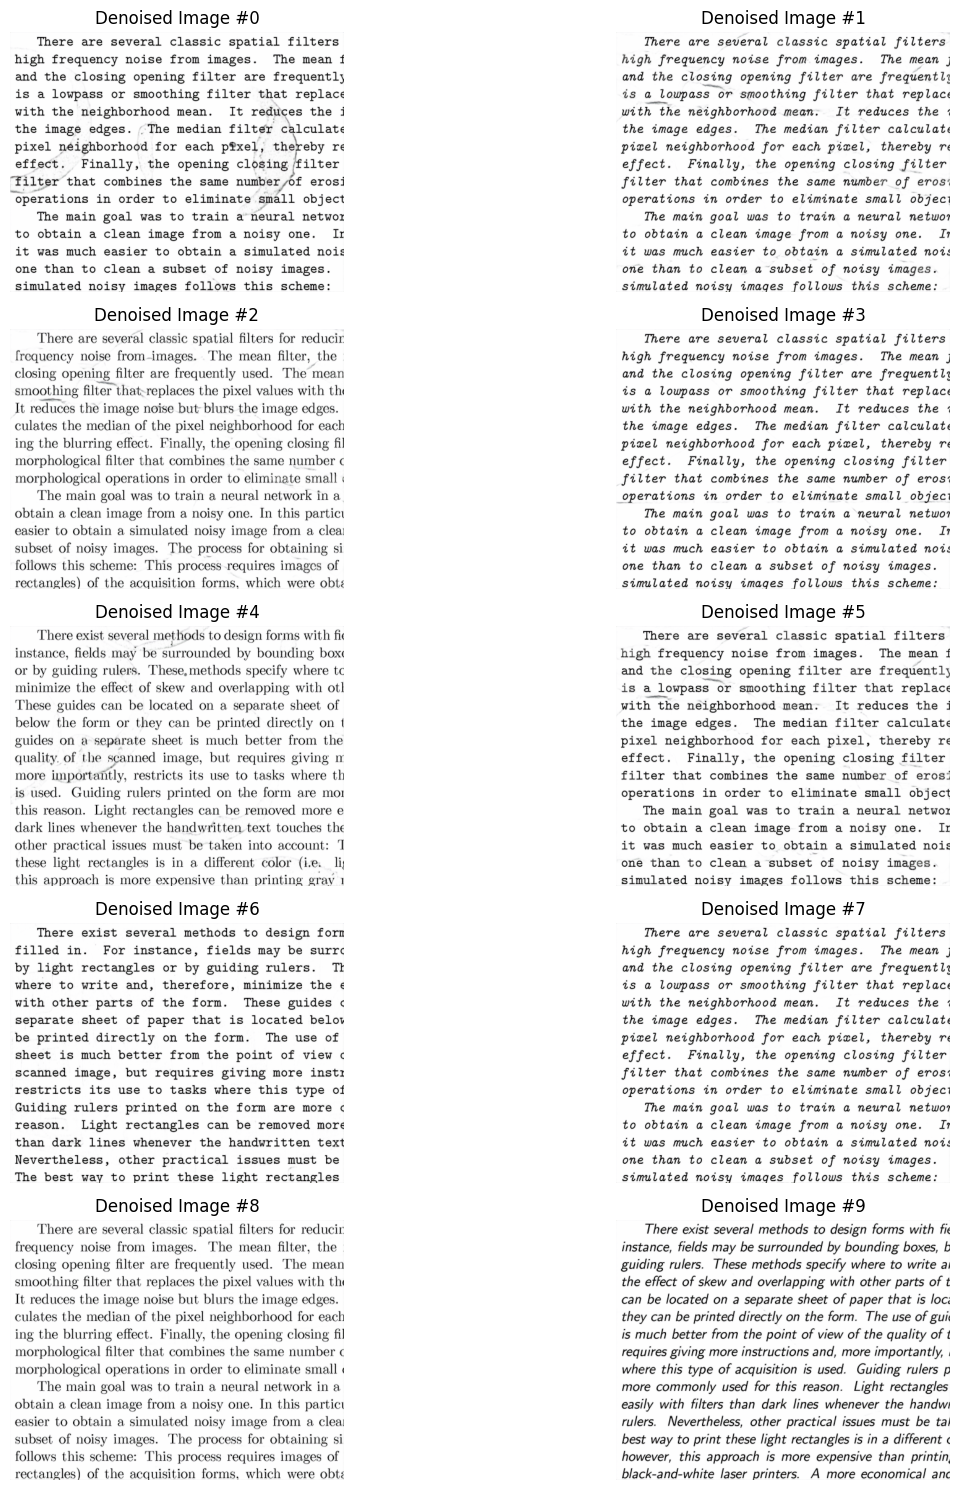

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

index = 0
for i in range(5):
    for j in range(2):
        ax[i, j].imshow(test_data_predicted[index])
        ax[i, j].set_title(f"Denoised Image #{index}")
        ax[i, j].axis('off')
        index += 1

plt.tight_layout()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Flattened MSE over the whole dataset
mse_total = mean_squared_error(test.flatten(), test_data_predicted.flatten())
print(f"Overall Mean Squared Error (MSE): {mse_total:.4f}")

# Compute average SSIM per image
total_ssim = 0
n_samples = len(test)

ssim_scores = []

for i in range(n_samples):
    true_img = test[i]
    pred_img = test_data_predicted[i]

    # Compute SSIM for each image
    ssim_value = ssim(true_img, pred_img, data_range=1.0, channel_axis=-1)

    total_ssim += ssim_value

    ssim_scores.append(ssim_value)

# Average
avg_ssim = total_ssim / n_samples

print(f"Average SSIM: {avg_ssim:.4f}")

Overall Mean Squared Error (MSE): 0.0212
Average SSIM: 0.8447
